<a href="https://colab.research.google.com/github/KatyaKatyaKatyaSSS/DKR-1/blob/main/HW_linregress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Домашнее задание: Линейная регрессия

Созина Екатерина ИСПк 402

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ --- столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ --- столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением --- то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

В курсе линейной алгебре широко известен факт о том, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$

и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

Заметьте, что если система векторов $x_1, \ldots, x_n$ линейно зависима, то обращаемая матрица будет сингулярной.

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ВятГУ от его роста H, веса W, длины волос L и N - количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени - это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} =
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ - это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} =
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом, хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Линейная регрессия

Вашей задачей будет построить линейную зависимость между ценой квартиры (поле price) и остальными доступными параметрами:

1. Скачайте файл [``flats_moscow_mod.txt``](https://disk.yandex.ru/i/M3aIS9z-7-jq6g). В нем содержатся данные о квартирах в Москве.
    Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик.

    Поля:
   * `totsp` - общая площадь в кв.м.
   * `livesp` - жилая площадь в кв.м.
   * `kitsp` - площадь кухни в кв.м.
   * `dist` - расстояние от центра в км.
   * `metrdist` - расстояние до метро в минутах.

2. Разбейте выборку на обучающую и тестовую.  Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

3. Оцените влияние признаков на цену квартиры с помощью коэффициентов корреляции.
4. Постройте уравнение регрессии. Найдите регрессионные коэффициенты. Какой смысл имеют их знаки и значения? Согласуются ли они с вашими представлениями о жизни?

5. Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [ ]:
import requests
from urllib.parse import urlencode
import pandas as pd

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/i/M3aIS9z-7-jq6g'  # Сюда вписываете ссылку на файл на Яндекс-диске

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
download_url = requests.get(final_url).json()['href']





In [ ]:
data = pd.read_csv(download_url,sep='\t') # Разделитель табуляция
data.head()

,price,totsp,livesp,kitsp,dist,metrdist
0,81,58,40,6.0,12.5,7
1,75,44,28,6.0,13.5,7
2,128,70,42,6.0,14.5,3
3,95,61,37,6.0,13.5,7
4,330,104,60,11.0,10.5,7


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from google.colab import files

# 1. Загружаем файл вручную
uploaded = files.upload()




Saving flats_moscow_mod.txt to flats_moscow_mod.txt


Первые строки данных:
   price  totsp  livesp  kitsp  dist  metrdist
0     81     58      40    6.0  12.5         7
1     75     44      28    6.0  13.5         7
2    128     70      42    6.0  14.5         3
3     95     61      37    6.0  13.5         7
4    330    104      60   11.0  10.5         7


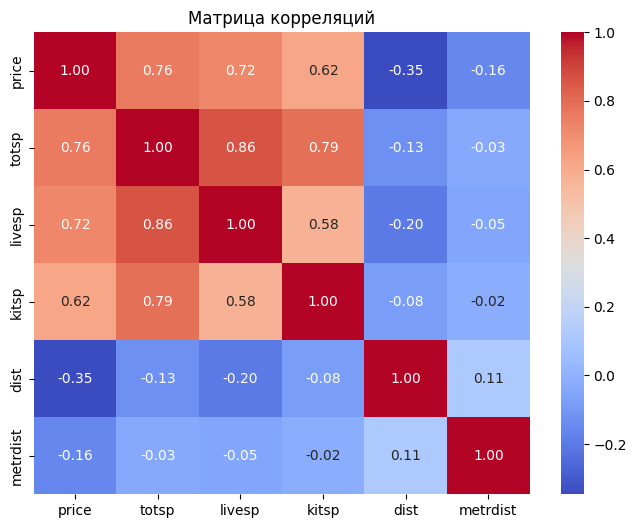

Коэффициенты регрессии:
    Признак  Коэффициент
0     totsp     1.448219
1    livesp     1.376894
2     kitsp     2.380780
3      dist    -3.330556
4  metrdist    -1.367421
Среднеквадратичная ошибка (MSE): 1212.90


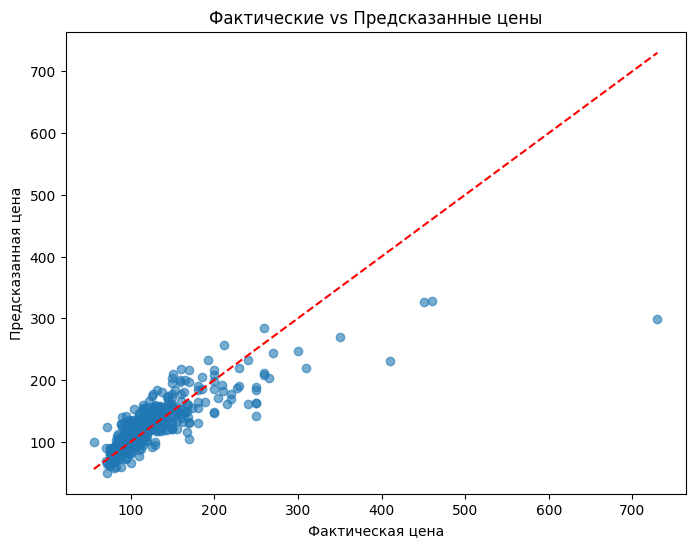

In [2]:
# 2. Получаем имя загруженного файла
file_name = list(uploaded.keys())[0]

# 3. Загружаем данные в DataFrame
data = pd.read_csv(file_name, sep="\t")  # Разделитель - табуляция

# 4. Просмотр первых строк
print("Первые строки данных:")
print(data.head())

# 5. Разделение данных на обучающую и тестовую выборки
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 6. Корреляционный анализ
plt.figure(figsize=(8, 6))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляций")
plt.show()

# 7. Выбор признаков и целевой переменной
X_train = train_data.drop(columns=['price'])
y_train = train_data['price']
X_test = test_data.drop(columns=['price'])
y_test = test_data['price']

# 8. Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# 9. Коэффициенты регрессии
coefficients = pd.DataFrame({'Признак': X_train.columns, 'Коэффициент': model.coef_})
print("Коэффициенты регрессии:")
print(coefficients)

# 10. Оценка качества модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")

# 11. Визуализация предсказаний
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Фактическая цена")
plt.ylabel("Предсказанная цена")
plt.title("Фактические vs Предсказанные цены")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

### Задание 2. Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, разными способами:
* нормализуя признаки;
* добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения;
* выполняя дискретизацию признаков с помощью `KBinsDiscretizer`;
* выполняя логарифмирование целевой переменной.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся, и преобразовывая имеющиеся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению.

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно. Для проверки подойдет тестовая выборка.

Saving flats_moscow_mod.txt to flats_moscow_mod (1).txt
Среднеквадратичная ошибка БАЗОВОЙ модели: 1212.90
Среднеквадратичная ошибка УСЛОЖНЕННОЙ модели: 992.03


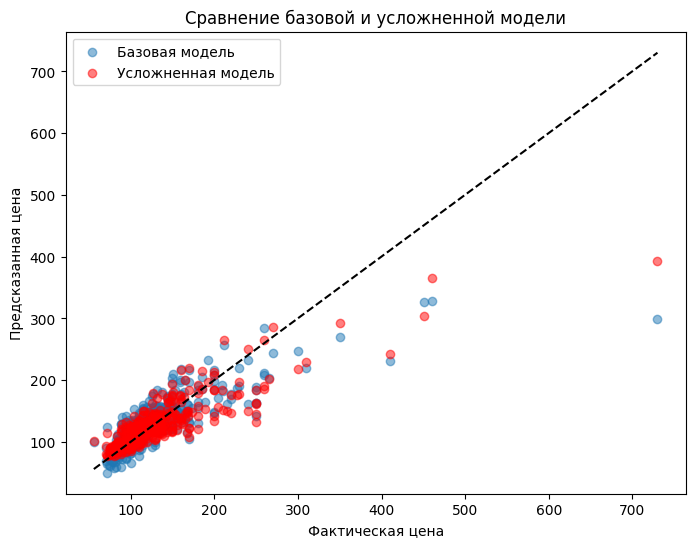

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from google.colab import files

# 1. Загрузка файла вручную
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 2. Читаем данные
data = pd.read_csv(file_name, sep="\t")

# 3. Разделяем данные
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 4. Выбираем признаки и целевую переменную
X_train = train_data.drop(columns=['price'])
y_train = train_data['price']
X_test = test_data.drop(columns=['price'])
y_test = test_data['price']

# 5. **Нормализация признаков**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. **Добавляем нелинейные признаки**
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)  # Квадратичные признаки
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 7. **Логарифмирование целевой переменной**
log_transformer = FunctionTransformer(np.log1p, validate=True)
y_train_log = log_transformer.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_log = log_transformer.transform(y_test.values.reshape(-1, 1)).flatten()

# 8. **Обучение улучшенной модели**
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_log)

# 9. **Предсказания и оценка ошибки**
y_pred_poly = np.expm1(model_poly.predict(X_test_poly))  # Обратное логарифмирование
mse_poly = mean_squared_error(y_test, y_pred_poly)

# 10. **Сравнение с базовой моделью**
model_base = LinearRegression()
model_base.fit(X_train_scaled, y_train)
y_pred_base = model_base.predict(X_test_scaled)
mse_base = mean_squared_error(y_test, y_pred_base)

print(f"Среднеквадратичная ошибка БАЗОВОЙ модели: {mse_base:.2f}")
print(f"Среднеквадратичная ошибка УСЛОЖНЕННОЙ модели: {mse_poly:.2f}")

# 11. **Визуализация предсказаний**
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_base, alpha=0.5, label="Базовая модель")
plt.scatter(y_test, y_pred_poly, alpha=0.5, label="Усложненная модель", color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel("Фактическая цена")
plt.ylabel("Предсказанная цена")
plt.title("Сравнение базовой и усложненной модели")
plt.legend()
plt.show()


### Задание 3. Регуляризация

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы - необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них - регуляризация. Сейчас мы рассмотрим одну из её разновидностей --- **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ --- некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала.

Собственно задание:
* Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2.
* По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` регуляризации и на тестовой выборке измерьте качество лучшей полученной модели.

Saving flats_moscow_mod.txt to flats_moscow_mod (2).txt
Оптимальный параметр регуляризации (λ): 10.000
Среднеквадратичная ошибка (MSE) на тестовой выборке: 1222.98


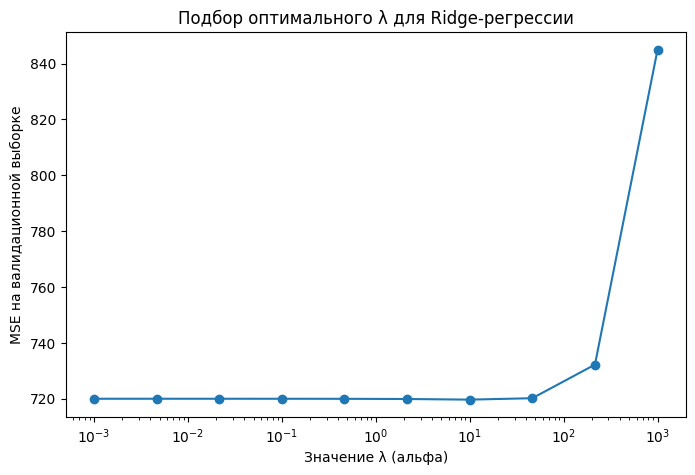

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from google.colab import files

# 1. Загрузка файла вручную
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 2. Читаем данные
data = pd.read_csv(file_name, sep="\t")

# 3. Разделяем данные: обучающая (train) и тестовая (test) выборки
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 4. Разбиваем обучающую выборку на train (80%) и validation (20%)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# 5. Выбираем признаки и целевую переменную
X_train = train_data.drop(columns=['price'])
y_train = train_data['price']
X_val = val_data.drop(columns=['price'])
y_val = val_data['price']
X_test = test_data.drop(columns=['price'])
y_test = test_data['price']

# 6. **Нормализация данных**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 7. **Подбор лучшего λ (альфа) по логарифмической сетке**
alphas = np.logspace(-3, 3, 10)  # Логарифмическая шкала от 0.001 до 1000
errors = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_val_pred = ridge.predict(X_val_scaled)
    mse = mean_squared_error(y_val, y_val_pred)
    errors.append(mse)

# 8. **Оптимальное значение λ**
best_alpha = alphas[np.argmin(errors)]
print(f"Оптимальный параметр регуляризации (λ): {best_alpha:.3f}")

# 9. **Обучение Ridge-регрессии с оптимальным λ**
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, y_train)

# 10. **Оценка модели на тестовой выборке**
y_test_pred = ridge_best.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Среднеквадратичная ошибка (MSE) на тестовой выборке: {mse_test:.2f}")

# 11. **График зависимости ошибки от λ**
plt.figure(figsize=(8, 5))
plt.plot(alphas, errors, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel("Значение λ (альфа)")
plt.ylabel("MSE на валидационной выборке")
plt.title("Подбор оптимального λ для Ridge-регрессии")
plt.show()
